In [ ]:
#### This is very well done Ashley. Good job. 20/20. 

In [156]:
# Python Version 3.9.13, conda version 22.9.0 (conda -V)

In [157]:
import pandas as pd # v 1.5.3
import numpy as np # v 1.21.5
import matplotlib.pyplot as plt # v 3.5.2

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [158]:
df = pd.read_csv(r"/Users/yelim/Documents/GitHub/DATA-300-Statistical-Machine-Learning-Fall-2023-/Data/loan_default_data_set.csv")

In [159]:
df.head()

,tot_balance,avg_bal_cards,credit_age,credit_age_good_account,credit_card_age,num_acc_30d_past_due_12_months,num_acc_30d_past_due_6_months,num_mortgage_currently_past_due,tot_amount_currently_past_due,num_inq_12_month,...,num_card_12_month,num_auto_ 36_month,uti_open_card,pct_over_50_uti,uti_max_credit_line,pct_card_over_50_uti,ind_XYZ,rep_income,rep_education,Def_ind
0,102956.1101,14819.05740,238,104,264,0,0,0,0.0,0,...,1,0,0.366737,0.342183,0.513934,0.550866,0,118266.32130,college,0
1,132758.7258,18951.93455,384,197,371,0,0,0,0.0,0,...,0,0,0.490809,0.540671,0.418016,NaN,0,89365.05765,college,0
2,124658.9174,15347.92969,277,110,288,0,0,0,0.0,0,...,0,0,0.359074,0.338560,0.341627,0.451417,0,201365.12130,college,0
3,133968.5369,14050.71334,375,224,343,0,0,0,0.0,2,...,1,0,0.700379,0.683589,0.542940,0.607843,0,191794.48550,college,0
4,143601.8017,14858.51527,374,155,278,0,0,0,0.0,0,...,0,0,0.647351,0.510812,0.632934,0.573680,0,161465.36790,graduate,0


In [160]:
column_means = df.mean()
df.fillna(column_means, inplace=True)

column_modes = df.mode().iloc[0]
df.fillna(column_modes, inplace=True)

/var/folders/cn/3_xbgw9n7w387jn918941b2w0000gn/T/ipykernel_39924/785470536.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  column_means = df.mean()


In [161]:
df['Def_ind'].value_counts()

0    18000
1     2000
Name: Def_ind, dtype: int64

## 1. Create three samples of the data:

In [162]:
df.drop(columns = "rep_education", inplace =  True)

In [163]:
X = df.loc[:, df.columns != 'Def_ind']
y = df['Def_ind']

#### a.	The first should be created by oversampling the minority class so that the number of observations of the minority and majority class are the same (18,000 for each class) and you have 36, 000 observations in total. 

In [164]:
oversampler = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversampler.fit_resample(X, y)

#### b.	The second should be created by undersampling the majority class (2000 observations for each class) and you have 4000 observations in total. 

In [165]:
undersampler = RandomUnderSampler(sampling_strategy='majority')
X_under, y_under = undersampler.fit_resample(X, y)

#### c.	Use SMOTE to create the third data set. This is also an oversampling technique. 
Make sure you save your datasets.

In [166]:
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X, y)

## 2. Fit a Logistic regression and Linear Discriminant Analysis (LDA) on all three datasets so that you have 6 model objects. A model for each of the three datasets you have created by using different sampling techniques.

In [167]:
def fit_models(X, y):
    lr_model = LogisticRegression().fit(X, y)
    lda_model = LinearDiscriminantAnalysis().fit(X, y)
    return lr_model, lda_model

models.append(fit_models(X_over, y_over))
models.append(fit_models(X_under, y_under))
models.append(fit_models(X_smote, y_smote))

## 3. Compare model performance on accuracy, recall, and precision. Report your findings.

In [168]:
for i, (X, y) in enumerate([(X_over, y_over), (X_under, y_under), (X_smote, y_smote)]):
    lr_model, lda_model = models[i]
    y_pred_lr = lr_model.predict(X)
    y_pred_lda = lda_model.predict(X)

    accuracy_lr = accuracy_score(y, y_pred_lr)
    precision_lr = precision_score(y, y_pred_lr)
    recall_lr = recall_score(y, y_pred_lr)

    accuracy_lda = accuracy_score(y, y_pred_lda)
    precision_lda = precision_score(y, y_pred_lda)
    recall_lda = recall_score(y, y_pred_lda)

    print(f"Dataset {i + 1}:")
    print("Logistic Regression - Accuracy: {:.2f}, Precision: {:.2f}, Recall: {:.2f}".format(accuracy_lr, precision_lr, recall_lr))
    print("LDA - Accuracy: {:.2f}, Precision: {:.2f}, Recall: {:.2f}".format(accuracy_lda, precision_lda, recall_lda))

Dataset 1:
Logistic Regression - Accuracy: 0.64, Precision: 0.69, Recall: 0.50
LDA - Accuracy: 0.72, Precision: 0.73, Recall: 0.69
Dataset 2:
Logistic Regression - Accuracy: 0.65, Precision: 0.70, Recall: 0.52
LDA - Accuracy: 0.72, Precision: 0.73, Recall: 0.71
Dataset 3:
Logistic Regression - Accuracy: 0.64, Precision: 0.68, Recall: 0.53
LDA - Accuracy: 0.75, Precision: 0.74, Recall: 0.79


## 4.	Plot an AUC_ROC curve and choose the best model based on the curve.

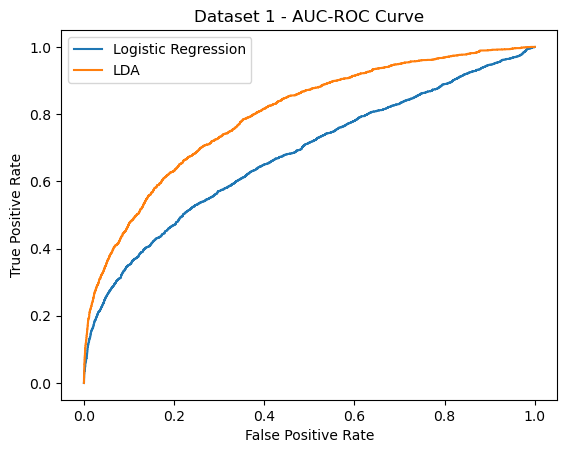

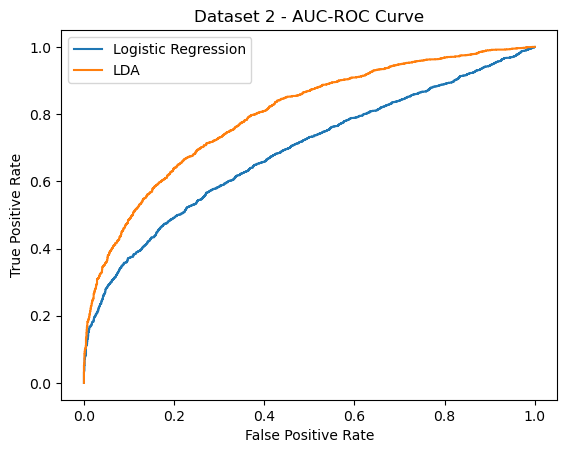

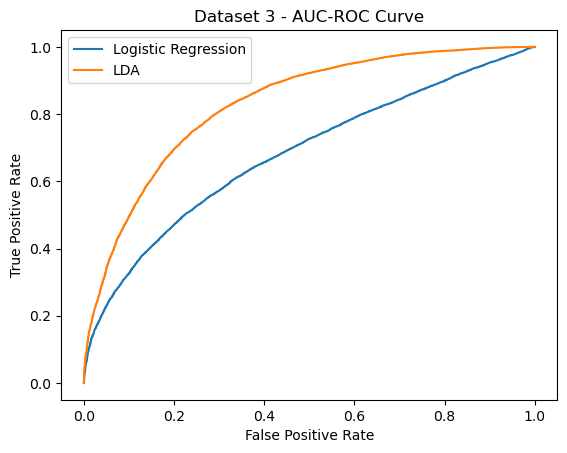

Dataset 1 - Logistic Regression AUC: 0.68
Dataset 1 - LDA AUC: 0.80
Dataset 2 - Logistic Regression AUC: 0.69
Dataset 2 - LDA AUC: 0.80
Dataset 3 - Logistic Regression AUC: 0.68
Dataset 3 - LDA AUC: 0.83


In [169]:
auc_values_lr = []
auc_values_lda = []

for i, (X, y) in enumerate([(X_over, y_over), (X_under, y_under), (X_smote, y_smote)]):
    lr_model, lda_model = models[i]
    y_pred_lr_prob = lr_model.predict_proba(X)[:, 1]
    y_pred_lda_prob = lda_model.predict_proba(X)[:, 1]

    fpr_lr, tpr_lr, _ = roc_curve(y, y_pred_lr_prob)
    fpr_lda, tpr_lda, _ = roc_curve(y, y_pred_lda_prob)
    
    auc_lr = roc_auc_score(y, y_pred_lr_prob)
    auc_lda = roc_auc_score(y, y_pred_lda_prob)

    auc_values_lr.append(auc_lr)
    auc_values_lda.append(auc_lda)

    plt.figure()
    plt.plot(fpr_lr, tpr_lr, label='Logistic Regression')
    plt.plot(fpr_lda, tpr_lda, label='LDA')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Dataset {i + 1} - AUC-ROC Curve')
    plt.legend()
    plt.show()
    
for i, dataset in enumerate(["Dataset 1", "Dataset 2", "Dataset 3"]):
    print(f"{dataset} - Logistic Regression AUC: {auc_values_lr[i]:.2f}")
    print(f"{dataset} - LDA AUC: {auc_values_lda[i]:.2f}")

## 5.	Which model would you prefer?  Explain. 

LDA outperforms Logistic Regression in accuracy, precision, and recall in all three datasets. LDA has the highest accuracy in Dataset 3, then Dataset 2 and then Dataset 1. It has higher precision and recall values for each dataset, suggesting that it is a better model for identifying the positive class and capturing true positives. As LDA model for dataset 3 has the highest AUC score, I would conclude LDA on dataset 3 to be the best in terms of overall classification performance.